# Analysis

## Rabi

In [516]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240223'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240223-200720-386-40d4fc-rabi_oscillations'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)

20240223-200720-386-40d4fc-rabi_oscillations


In [517]:
dataset = ds
qubit = 'q17'
x = dataset[f'mw_amplitudes{qubit}'].values # MHz

qubit = 'q17'
magnitudes0 = np.array([np.linalg.norm(v) for v in dataset[f'y{qubit}']])
qubit = 'q22'
magnitudes1 = np.array([np.linalg.norm(v) for v in dataset[f'y{qubit}']])
# total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
# min_index = np.argmin(magnitudes0)
# min_index = np.unravel_index(min_index, magnitudes0.shape)
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

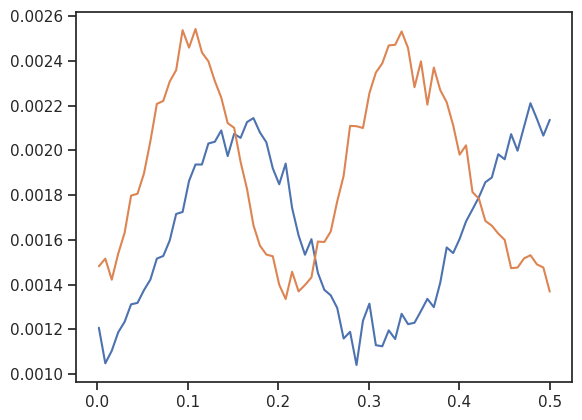

0.0011240672762580213 0.002210463928974368 0.00140861526140642 0.0025418835610925895


In [518]:
plt.plot(x,magnitudes0)
plt.plot(x,magnitudes1)
plt.show()
q17g,q17e,q22g,q22e=np.min(magnitudes0),np.max(magnitudes0),np.min(magnitudes1),np.max(magnitudes1)
q17g,q22g = np.mean([magnitudes0[0],q17g]),np.mean([magnitudes1[0],q22g])
print(q17g,q17e,q22g,q22e)

## Reset QC

In [610]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240228'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240228-002451-110-8e1e79-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240228-002451-110-8e1e79-reset_chevron


In [611]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
q17g,q17e = np.min(magnitudes0),np.max(magnitudes0)
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(15, 10)
4.105263157894737 301.0


In [612]:
# %matplotlib inline
# plot_index = min_index[0]
# # plot_index = 2
# print(f'cz_pulse_durations = {y[plot_index]}')
# plt.figure(figsize=(5,5))
# plt.plot(x, magnitudes0[plot_index],'-r')
# plt.plot(x, magnitudes1[plot_index],'-b')
# # plt.plot(x, total_magnitude[plot_index],'-k')
# plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
# plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
# plt.show()

cz_pulse_amplitudes_idx = 12
cz_pulse_amplitudes = 4.526315789473684
min = 0.010042863404212923
argmin = 6
min_t = 121.00000000000001


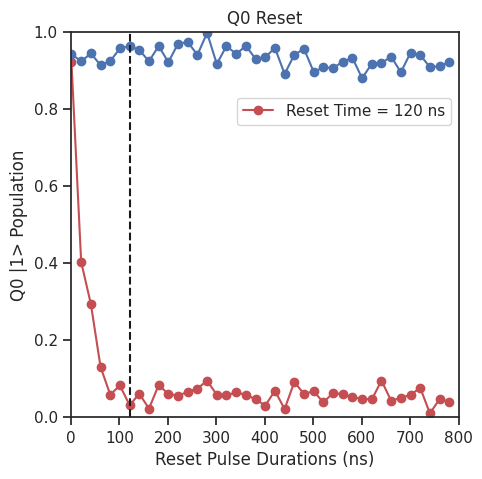

In [613]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [2]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])
    min_id = 6
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 |1> Population')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,800)
    plt.legend(loc='upper right', bbox_to_anchor=(1,0.85))
plt.savefig('reset/reset_chevron_q0_e_cut.png',dpi=300)
plt.show()

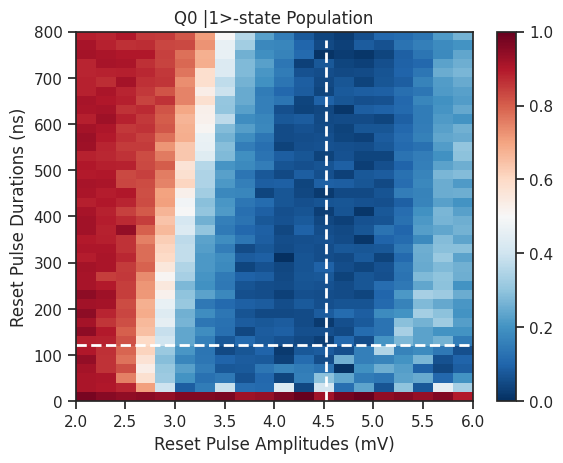

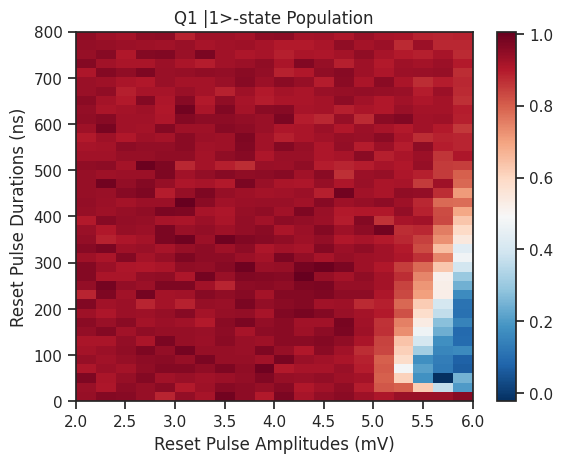

In [614]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
plt.vlines(x[12], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[6], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q0_e.png',dpi=300)
plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_e.png',dpi=300)
plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

## Reset QC

In [599]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240228'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
# name = names[-1]
name = '20240228-004915-468-e2bb11-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240228-004915-468-e2bb11-reset_chevron


In [600]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(28, 16)
5.368421052631578 561.0


In [601]:
# %matplotlib inline
# plot_index = min_index[0]
# # plot_index = 2
# print(f'cz_pulse_durations = {y[plot_index]}')
# plt.figure(figsize=(5,5))
# plt.plot(x, magnitudes0[plot_index],'-r')
# plt.plot(x, magnitudes1[plot_index],'-b')
# # plt.plot(x, total_magnitude[plot_index],'-k')
# plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
# plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
# plt.show()

cz_pulse_amplitudes_idx = 12
cz_pulse_amplitudes = 4.526315789473684
min = 0.11432395230787962
argmin = 23
min_t = 461.0


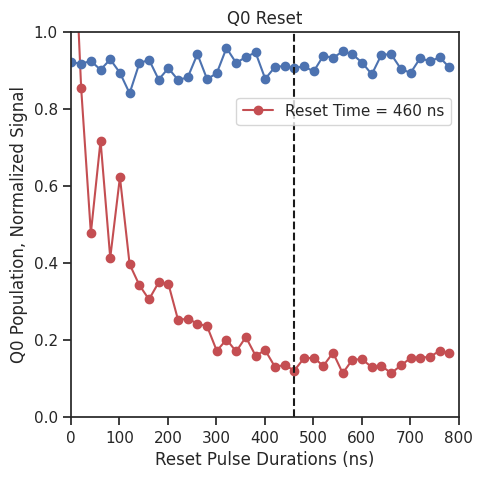

In [607]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [-4]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])-5
    # min_id = 6
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 Population, Normalized Signal')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,800)
    plt.legend(loc='upper right', bbox_to_anchor=(1,0.85))
plt.savefig('reset/reset_chevron_q0_f_cut.png',dpi=300)
plt.show()

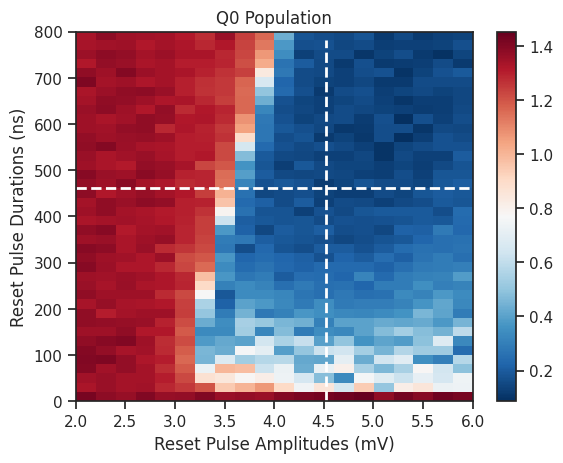

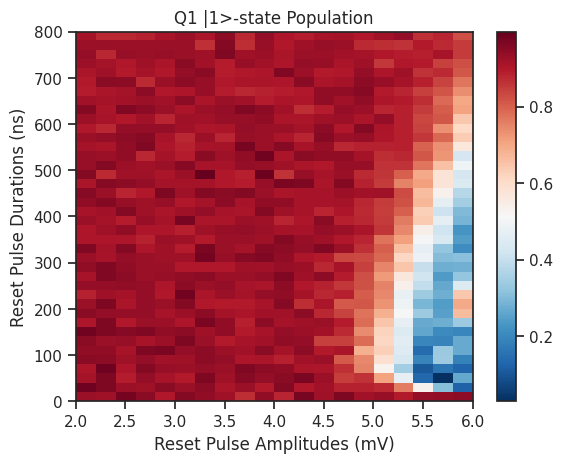

In [609]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
plt.vlines(x[12], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[23], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q0_f.png',dpi=300)

plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_f.png',dpi=300)

plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

## Reset CR

In [648]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240228'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240228-113308-946-9f9fd1-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240228-113308-946-9f9fd1-reset_chevron


In [649]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(22, 11)
-13.815789473684212 551.0


cz_pulse_amplitudes_idx = 11
cz_pulse_amplitudes = -13.815789473684212
min = -0.01353410649833649
argmin = 14
min_t = 351.0


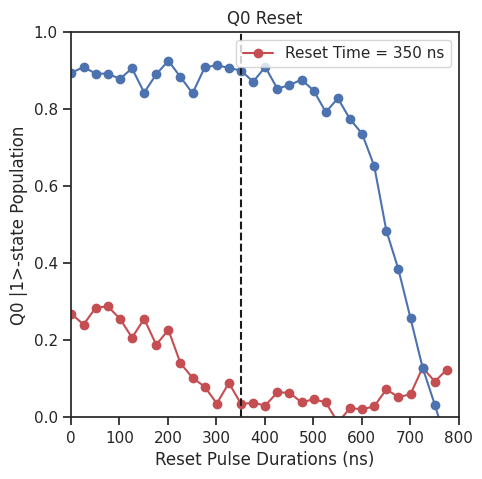

In [650]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [0]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])-8
    # min_id = 6
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 |1>-state Population')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,800)
    plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.savefig('reset/reset_chevron_q0_e_cr_cut.png',dpi=300)
plt.show()

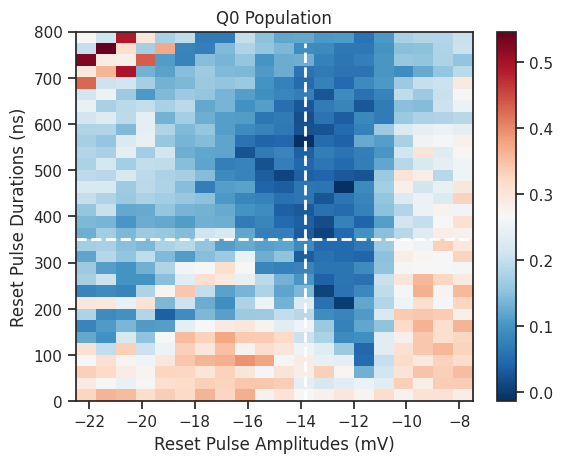

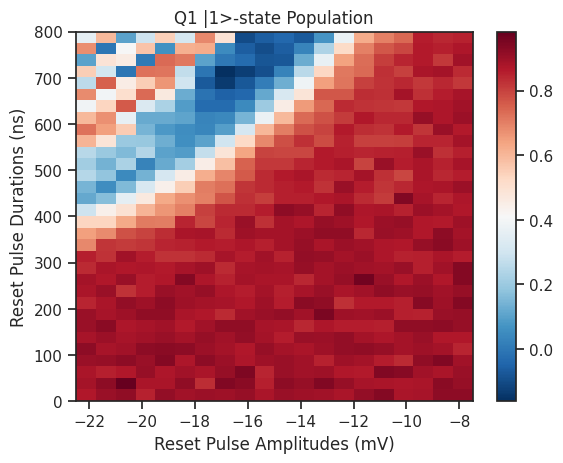

In [651]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
plt.vlines(x[11], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[14], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q0_e_cr.png',dpi=300)

plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_e_cr.png',dpi=300)

plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

## Reset CR

In [652]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240228'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
# name = names[-1]
name = '20240228-110944-796-ab9e33-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240228-110944-796-ab9e33-reset_chevron


In [653]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(18, 11)
-13.815789473684212 451.0


cz_pulse_amplitudes_idx = 11
cz_pulse_amplitudes = -13.815789473684212
min = 0.06564562436301728
argmin = 14
min_t = 351.0


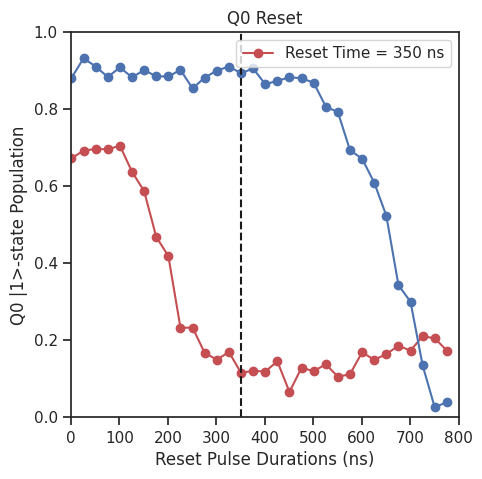

In [654]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [0]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])
    min_id = 14
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 |1>-state Population')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,800)
    plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.savefig('reset/reset_chevron_q0_f_cr_cut.png',dpi=300)
plt.show()

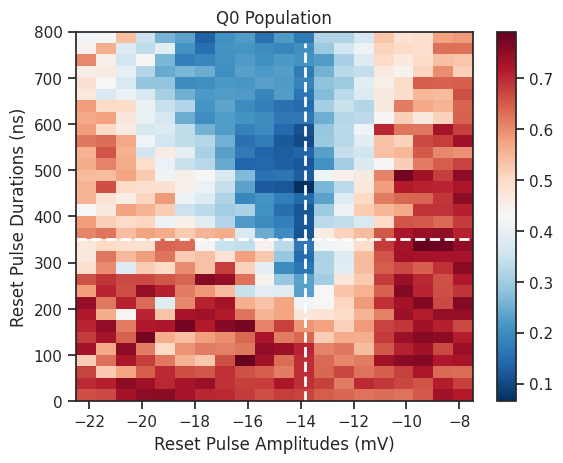

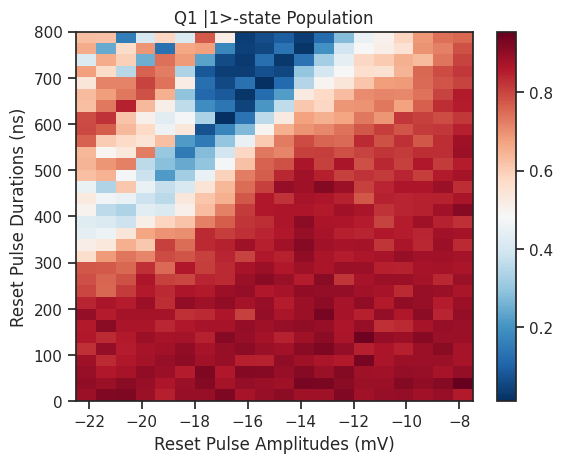

In [655]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
plt.vlines(x[11], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[14], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q0_f_cr.png',dpi=300)

plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 800],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_f_cr.png',dpi=300)

plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

In [680]:
reset_data_rep = np.array([[0.    ,0.    ,0.    ,0.    ,0.    ,0.    ,0.    ,0.    ,0.   ],
[0.    ,0.   , 0.   , 0.006 ,0.    ,0.    ,0.028 ,0.046 ,0.02 ],
[0.    ,0.    ,0.    ,0.003 ,0.    ,0.  ,  0. ,   0.  ,  0.031],
[0.000e+00, 0.000e+00 ,0.000e+00 ,0.000e+00 ,0.000e+00 ,0.000e+00, 9.266e-04 ,1.460e-03 ,0.000e+00],
[0.    ,0.    ,0.   , 0. ,   0.  ,  0. ,   0.011 ,0. ,   0.   ],
[0. ,   0.   , 0.  ,  0.   , 0.  ,  0.  ,  0.    ,0.008, 0.   ],
[0. ,   0.  ,  0.   , 0.  ,  0.016, 0.   , 0.009, 0.  ,  0.02 ],
 [0.  ,  0.,    0.   , 0.001, 0.    ,0.033 ,0.027 ,0.    ,0.   ],
  [0.000e+00 ,9.692e-04 ,0.000e+00 ,0.000e+00 ,0.000e+00 ,2.502e-02, 5.597e-03 ,2.773e-03 ,2.308e-02]
])
reset_fidelity_rep = 1-np.mean(reset_data_rep,axis=0)
reset_std_rep = np.std(reset_data_rep,axis=0)
print(reset_fidelity_rep)
print(reset_std_rep)
print(np.mean(reset_fidelity_rep[3:6]),np.mean(reset_std_rep[3:6]))
print(np.mean(reset_fidelity_rep[6:9]),np.mean(reset_std_rep[6:9]))

[1.         0.99989231 1.         0.99888889 0.99822222 0.99355333
 0.99094182 0.99352967 0.98954667]
[0.         0.00030459 0.         0.00196889 0.00502831 0.0122064
 0.01058684 0.01419325 0.01206573]
0.9968881481481482 0.006401201400984063
0.9913393851851852 0.012281937618138618


In [675]:
reset_data = np.array([[0.004, 0.002, 0.    ,0.008,0.013,0.01 ,0.136,0.105,0.048],
[0.    ,0.    ,0.    ,0.02  ,0.014 ,0.055 ,0.102 ,0.09  ,0.134],
[0.    ,0.    ,0.    ,0.    ,0.001 ,0.    ,0.128 ,0.118 ,0.14 ],
[0.   , 0.    ,0.    ,0.    ,0.    ,0.    ,0.051 ,0.041 ,0.087],
[0.    ,0.    ,0.    ,0.    ,0.    ,0.007 ,0.109 ,0.078 ,0.082],
 [0.009, 0.009 ,0.    ,0.    ,0.    ,0.    ,0.126 ,0.147 ,0.099],
 [0.    ,0.    ,0.006 ,0.022 ,0.052 ,0.047 ,0.197 ,0.175 ,0.137],
 [0.    ,0.016 ,0.    ,0.011 ,0.    ,0.019 ,0.127 ,0.101 ,0.085],
 [0.    ,0.   , 0.    ,0.    ,0.    ,0.    ,0.065 ,0.061 ,0.086],
  [0.000e+00 ,0.000e+00 ,0.000e+00 ,0.000e+00 ,2.158e-02 ,8.423e-04 ,1.211e-01 ,1.309e-01, 1.487e-01],
 [0.    ,0.    ,0.   , 0.    ,0.    ,0.   , 0.025, 0.075 ,0.059] ])
reset_fidelity = 1-np.mean(reset_data,axis=0)
reset_std = np.std(reset_data,axis=0)
print(reset_fidelity)
print(reset_std)
print(np.mean(reset_fidelity[3:6]),np.mean(reset_std[3:6]))
print(np.mean(reset_fidelity[6:9]),np.mean(reset_std[6:9]))
    

[0.99881818 0.99754545 0.99945455 0.99445455 0.99076545 0.98737797
 0.89208182 0.89800909 0.89948182]
[0.00272424 0.00499752 0.00172488 0.00815044 0.01536718 0.01905074
 0.04470666 0.03730246 0.03274382]


In [679]:
print(np.mean(reset_fidelity[3:6]),np.mean(reset_std[3:6]))
print(np.mean(reset_fidelity[6:9]),np.mean(reset_std[6:9]))

0.9908659909090908 0.014189454246117833
0.8965242424242424 0.03825097945667922


In [542]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

NameError: name 'state_coord' is not defined

## Reset QC Square

In [713]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240224'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240224-221808-278-3fbc22-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240224-221808-278-3fbc22-reset_chevron


In [714]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
q17g,q17e = np.min(magnitudes0),np.max(magnitudes0)
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(16, 9)
4.736842105263158 17.0


In [715]:
# %matplotlib inline
# plot_index = min_index[0]
# # plot_index = 2
# print(f'cz_pulse_durations = {y[plot_index]}')
# plt.figure(figsize=(5,5))
# plt.plot(x, magnitudes0[plot_index],'-r')
# plt.plot(x, magnitudes1[plot_index],'-b')
# # plt.plot(x, total_magnitude[plot_index],'-k')
# plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
# plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
# plt.show()

cz_pulse_amplitudes_idx = 11
cz_pulse_amplitudes = 5.7894736842105265
min = 0.3730487496133666
argmin = 6
min_t = 7.000000000000001


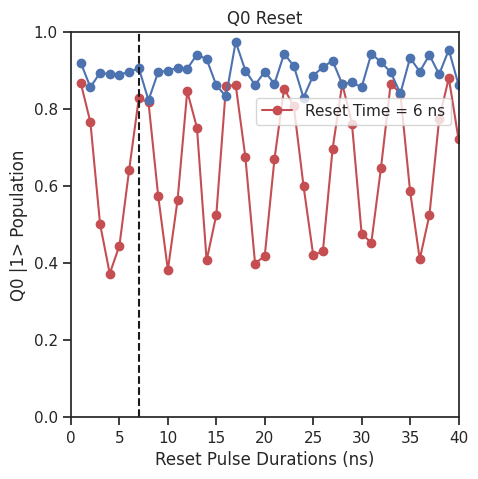

In [716]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [2]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])
    min_id = 6
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 |1> Population')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,40)
    plt.legend(loc='upper right', bbox_to_anchor=(1,0.85))
plt.savefig('reset/reset_chevron_q0_e_cut.png',dpi=300)
plt.show()

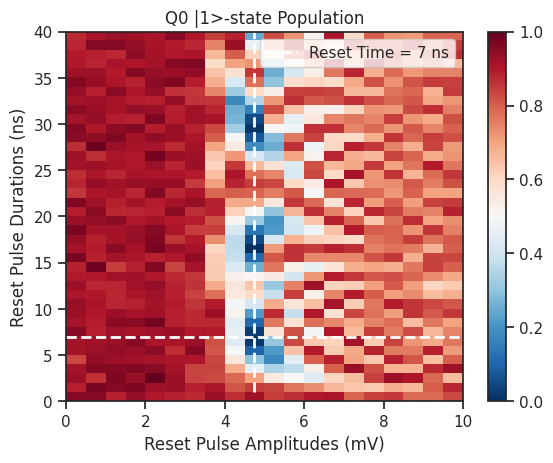

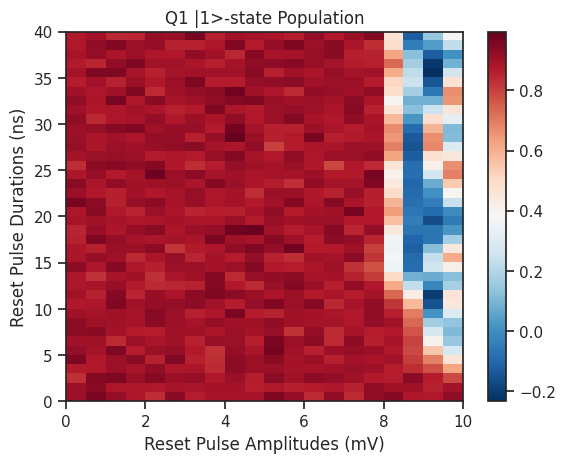

In [719]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
idx = [9,6]
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 40],  origin ='lower',cmap = cm)
plt.vlines(x[idx[0]], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[idx[1]], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w',label = 'Reset Time = %1.0f ns'%(y[idx[1]]))
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 |1>-state Population')
plt.colorbar()
plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.savefig('reset/reset_chevron_q0_e_square.png',dpi=300)
plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 40],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_e_square.png',dpi=300)
plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

## Reset QC

In [720]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240225'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240225-001628-108-1f557a-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240225-001628-108-1f557a-reset_chevron


In [721]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
q17g,q17e = np.min(magnitudes0),np.max(magnitudes0)
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(39, 5)
5.052631578947368 79.0


In [722]:
# %matplotlib inline
# plot_index = min_index[0]
# # plot_index = 2
# print(f'cz_pulse_durations = {y[plot_index]}')
# plt.figure(figsize=(5,5))
# plt.plot(x, magnitudes0[plot_index],'-r')
# plt.plot(x, magnitudes1[plot_index],'-b')
# # plt.plot(x, total_magnitude[plot_index],'-k')
# plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
# plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
# plt.show()

cz_pulse_amplitudes_idx = 7
cz_pulse_amplitudes = 5.473684210526316
min = 0.43959779731672227
argmin = 6
min_t = 13.000000000000002


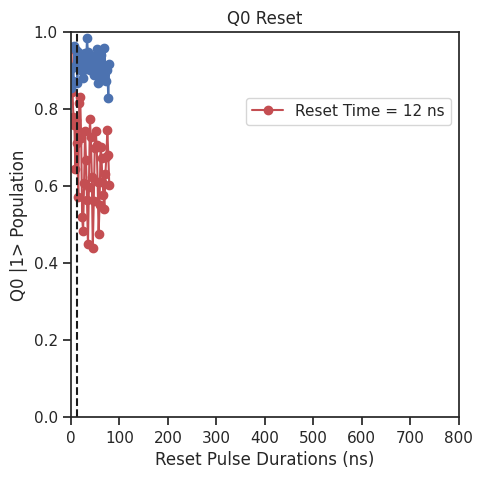

In [723]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [2]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])
    min_id = 6
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 |1> Population')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,800)
    plt.legend(loc='upper right', bbox_to_anchor=(1,0.85))
plt.savefig('reset/reset_chevron_q0_e_cut.png',dpi=300)
plt.show()

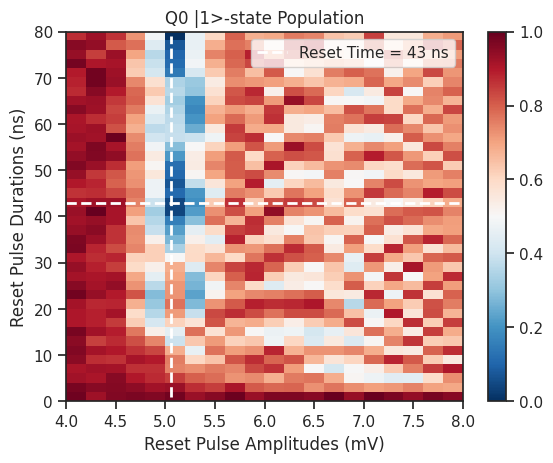

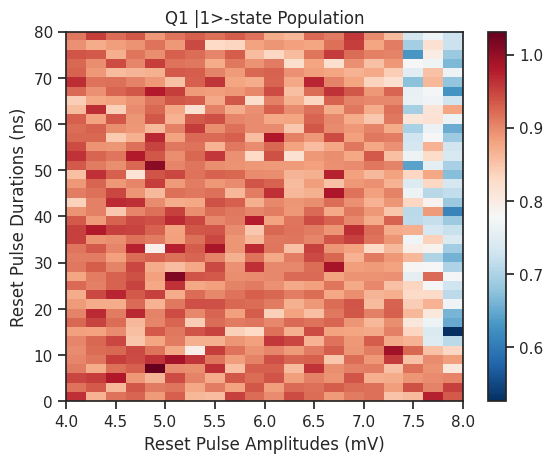

In [725]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
idx = [5,21]
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 80],  origin ='lower',cmap = cm)
plt.vlines(x[idx[0]], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[idx[1]], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w',label = 'Reset Time = %1.0f ns'%(y[idx[1]]))
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 |1>-state Population')
plt.colorbar()
plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.savefig('reset/reset_chevron_q0_f_square.png',dpi=300)
plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 80],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_f_square.png',dpi=300)
plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

## Reset QC Ramp

In [746]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240221'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240221-171648-363-9ae378-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240221-171648-363-9ae378-reset_chevron


In [747]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
q17g,q17e = np.min(magnitudes0),np.max(magnitudes0)
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(28, 15)
7.894736842105263 113.0


In [748]:
# %matplotlib inline
# plot_index = min_index[0]
# # plot_index = 2
# print(f'cz_pulse_durations = {y[plot_index]}')
# plt.figure(figsize=(5,5))
# plt.plot(x, magnitudes0[plot_index],'-r')
# plt.plot(x, magnitudes1[plot_index],'-b')
# # plt.plot(x, total_magnitude[plot_index],'-k')
# plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
# plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
# plt.show()

cz_pulse_amplitudes_idx = 15
cz_pulse_amplitudes = 7.894736842105263
min = 0.0
argmin = 6
min_t = 25.000000000000004


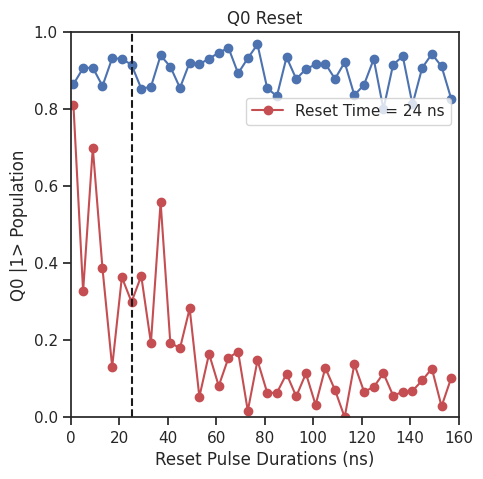

In [749]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [0]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])
    min_id = 6
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 |1> Population')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,160)
    plt.legend(loc='upper right', bbox_to_anchor=(1,0.85))
plt.savefig('reset/reset_chevron_q0_e_cut.png',dpi=300)
plt.show()

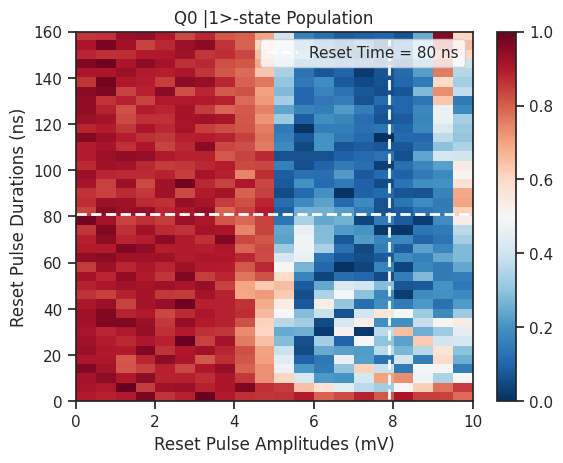

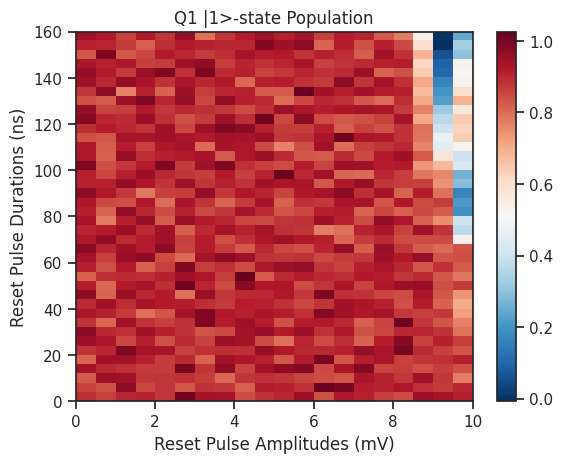

In [750]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
idx = [15,20]
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 160],  origin ='lower',cmap = cm)
plt.vlines(x[idx[0]], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[idx[1]], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w',label = 'Reset Time = %1.0f ns'%(y[idx[1]]-1))
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 |1>-state Population')
plt.colorbar()
plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.savefig('reset/reset_chevron_q0_e_ramp.png',dpi=300)
plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 160],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_e_ramp.png',dpi=300)
plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

## Reset QC Ramp

In [751]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv


# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20240223'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20240223-154544-562-ffc319-reset_chevron'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)
ds = ds.sortby('cz_pulse_amplitudesq17')
ds = ds.sortby('cz_pulse_amplitudesq22')

20240223-154544-562-ffc319-reset_chevron


In [752]:
dataset = ds
qubit = 'q17'
x = dataset[f'cz_pulse_amplitudes{qubit}'].values *100 # MHz
y = dataset[f'cz_pulse_durations{qubit}'].values*1e9 # ns

qubit = 'q17'
magnitudes0 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
q17g,q17e = np.min(magnitudes0),np.max(magnitudes0)
magnitudes0 = (magnitudes0-q17g)/(q17e-q17g)
qubit = 'q22'
magnitudes1 = np.array([[np.linalg.norm(u) for u in v] for v in dataset[f'y{qubit}']])
magnitudes1 = (magnitudes1-q22g)/(q22e-q22g)
total_magnitude = (magnitudes0+magnitudes1)/2
# sum_list =[]
# for mag in total_magnitude.T:
#     sum_list.append(np.sum(mag))
min_index = np.argmin(magnitudes0)
min_index = np.unravel_index(min_index, magnitudes0.shape)
print(min_index)
print(x[min_index[1]],y[min_index[0]])
# min_index = [7,18]
# print(min_index)
# print(x[min_index[1]],y[min_index[0]])

(2, 13)
8.105263157894738 41.0


In [753]:
# %matplotlib inline
# plot_index = min_index[0]
# # plot_index = 2
# print(f'cz_pulse_durations = {y[plot_index]}')
# plt.figure(figsize=(5,5))
# plt.plot(x, magnitudes0[plot_index],'-r')
# plt.plot(x, magnitudes1[plot_index],'-b')
# # plt.plot(x, total_magnitude[plot_index],'-k')
# plt.vlines(x[min_index[1]],0,1,colors='k',linestyles='dashed')
# plt.ylim(np.min(magnitudes0),np.max(magnitudes1))
# plt.show()

cz_pulse_amplitudes_idx = 13
cz_pulse_amplitudes = 8.105263157894738
min = 0.0
argmin = 6
min_t = 121.00000000000001


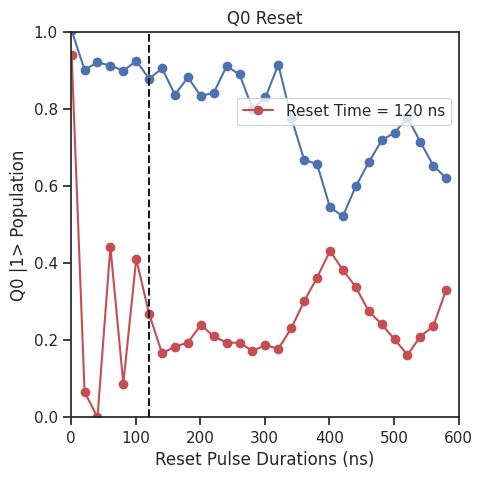

In [754]:
%matplotlib inline

import seaborn as sns

# Apply the default theme
sns.set_theme()
sns.set_style("ticks")

plt.figure(figsize=(5,5))
for i in [0]:
    plot_index = min_index[1]+i
    print(f'cz_pulse_amplitudes_idx = {plot_index}')
    # plot_index = 12
    print(f'cz_pulse_amplitudes = {x[plot_index]}')
    print(f'min = {np.min(magnitudes0.T[plot_index])}')
    min_id = np.argmin(magnitudes0.T[plot_index])
    min_id = 6
    print(f'argmin = {min_id}')
    print(f'min_t = {y[min_id]}')
    plt.plot(y, magnitudes0.T[plot_index],'-r',marker="o",label = 'Reset Time = %1.0f ns'%(y[min_id]-1))
    plt.plot(y, magnitudes1.T[plot_index],'-b',marker="o")
    # plt.plot(y, total_magnitude.T[plot_index],'-k')
    plt.vlines(y[min_id],0,1,colors='k',linestyles='dashed')
    plt.xlabel('Reset Pulse Durations (ns)')
    plt.ylabel('Q0 |1> Population')
    plt.title('Q0 Reset')
    plt.ylim(0,1)
    plt.xlim(0,600)
    plt.legend(loc='upper right', bbox_to_anchor=(1,0.85))
plt.savefig('reset/reset_chevron_q0_e_cut.png',dpi=300)
plt.show()

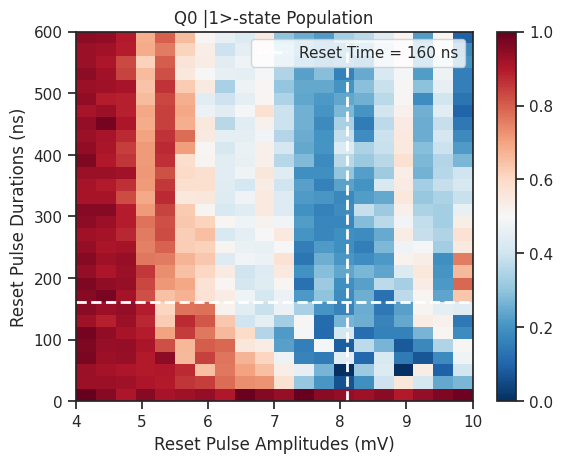

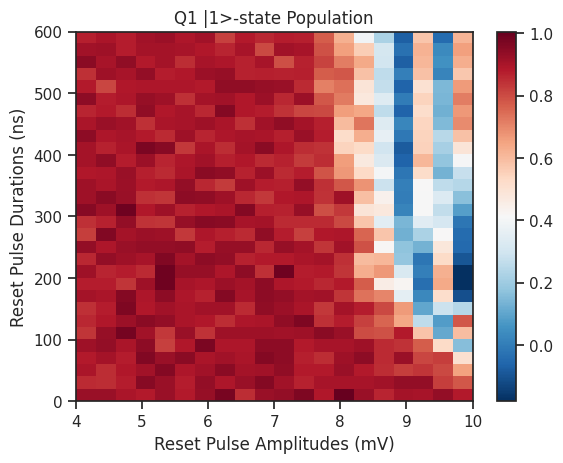

In [755]:
cm = sns.color_palette("RdBu_r", as_cmap=True)
sns.set_style("ticks")
idx = [13,8]
ax = plt.imshow(magnitudes0, aspect='auto',extent =[x.min(), x.max(),0, 600],  origin ='lower',cmap = cm)
plt.vlines(x[idx[0]], y.min(), y.max(), linestyles='dashed' ,lw=2,colors='w')
plt.hlines(y[idx[1]], x.min(), x.max(), linestyles='dashed' ,lw=2,colors='w',label = 'Reset Time = %1.0f ns'%(y[idx[1]]-1))
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q0 |1>-state Population')
plt.colorbar()
plt.legend(loc='upper right', bbox_to_anchor=(1,1))
plt.savefig('reset/reset_chevron_q0_f_ramp.png',dpi=300)
plt.show()

plt.imshow(magnitudes1, aspect='auto',extent =[x.min(), x.max(),0, 600],  origin ='lower',cmap = cm)
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
plt.xlabel('Reset Pulse Amplitudes (mV)')
plt.ylabel('Reset Pulse Durations (ns)')
plt.title('Q1 |1>-state Population')
plt.colorbar()
plt.savefig('reset/reset_chevron_q1_f_ramp.png',dpi=300)
plt.show()
# plt.imshow(total_magnitude, aspect='auto',extent =[x.max(), x.min(), y.min(), y.max()],  origin ='lower')
# plt.vlines(x[min_index[1]], y.min(), y.max(), linestyles='dashed' ,colors='r')
# plt.hlines(y[min_index[0]], x.min(), x.max(), linestyles='dashed' ,colors='r')
# plt.colorbar()
# plt.show()

## CZ_calibration Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
# name = '20231226-17`5522-736-99b290-cz_calibration_ssro'

from os import listdir
date = '20231231'
path = f'data_directory/{date}'
names = np.sort(listdir(path))
name = names[-1]
name = '20231231-121410-941-404eaf-cz_calibration_ssro'
print(name)
dp = f'data_directory/{date}/{name}/dataset.hdf5'
ds = load_dataset(dp)

20231231-121410-941-404eaf-cz_calibration_ssro


assignment = 0.6695963541666666
assignment = 0.6549479166666666


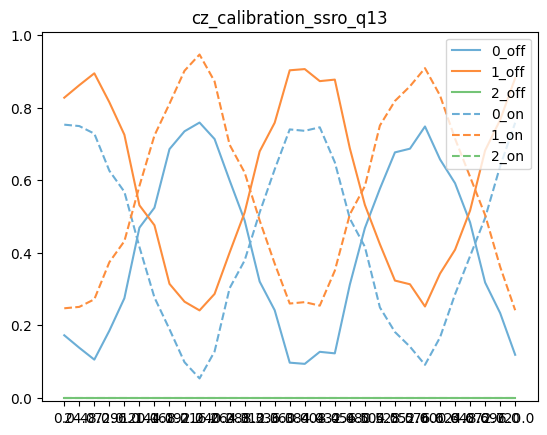

In [ ]:
%matplotlib inline

import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from scipy.linalg import norm
from scipy.optimize import minimize
from numpy.linalg import inv

def mitigate(v,cm_inv):
    u = np.dot(v,cm_inv)
    # print(u,np.sum(u))
    def m(t):
        return norm(u-np.array(t))
    def con(t):
        return t[0]+t[1]+t[2]-1
    cons = ({'type': 'eq', 'fun': con},
            {'type': 'ineq', 'fun': lambda t: t[0]},
            {'type': 'ineq', 'fun': lambda t: t[1]},
            {'type': 'ineq', 'fun': lambda t: t[2]})
    result = minimize(m, v, method='SLSQP', constraints=cons)
    w = np.abs(np.round(result.x,10))
    # print(w)
    return w

dataset = ds
for qubit in ['q13']:
# for qubit in ['q13','q14']:
# qubit = 'q13'
    data_var = f'y{qubit}'

    for coord in dataset.coords:
        if f'control_ons{qubit}' in str(coord):
            sweep_coord = coord
        elif f'ramsey_phases{qubit}' in str(coord):
            state_coord = coord
        elif 'shot' in str(coord):
            shot_coord = coord

    independents = dataset[state_coord].values[:-3]
    calibs = dataset[state_coord].values[-3:]
    sweeps = dataset.coords[sweep_coord]
    shots = len(dataset[shot_coord].values)
    magnitudes = []
    for indx, _ in enumerate(sweeps):
        # indx = 0
        # print(f'{indx = }')
        # print(f'{ro_amplitude.values = }')
        y = np.repeat(calibs,shots)
        IQ_complex = np.array([])
        for state, _ in enumerate(calibs):
            IQ_complex_0 = dataset[data_var].isel({sweep_coord:indx,state_coord:-3+state})
            IQ_complex = np.append(IQ_complex,IQ_complex_0)
        # IQ = np.array([I,Q]).T
        IQ = IQ_complex.reshape(-1,2)
        lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
        # breakpoint()
        # print(IQ)
        cla = lda.fit(IQ,y)
        y_pred = cla.predict(IQ)

        cm = confusion_matrix(y,y_pred)
        cm_norm = confusion_matrix(y,y_pred,normalize='true')
        cm_inv = inv(cm_norm)
        assignment = np.trace(cm_norm)/len(calibs)
        print(f'{assignment = }')

        # disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
        # disp.plot()
        # plt.show()

        raw_data = dataset[data_var].isel({sweep_coord:indx}).values
        raw_shape = raw_data.shape
        data_y_pred = cla.predict(raw_data.reshape(-1,2))
        data_y_pred = np.transpose(data_y_pred.reshape(raw_shape[:-1]))
        # print(data_y_pred.shape)
        # print(data_y_pred)
        data_res_shape = list(data_y_pred.shape[:-1])
        data_res_shape.append(len(calibs))

        data_res = np.array([])
        for index_2, sweep_2 in enumerate(data_y_pred):
            uniques, counts = np.unique(sweep_2, return_counts=True)
            raw_prob = counts/len(sweep_2)
            # print(raw_prob)
            mitigate_prob = mitigate(raw_prob,cm_inv)
            data_res = np.append(data_res,mitigate_prob)
            # print(mitigate_prob)
        data_res = data_res.reshape(data_res_shape)
        magnitudes.append(data_res)
    magnitudes = np.array(magnitudes)
    marker = ['-','--']
    legend = ['off','on']
    x = range(4)
    # colors = plt.get_cmap('RdBu_r')(np.linspace(0.2, 0.8, len(x)))
    # colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
    colors = plt.get_cmap('tab20c')
    for index,magnitude in enumerate(magnitudes):
        plt.plot(independents,magnitude[:-3,0],f'{marker[index]}',c=colors(1),label=f'0_{legend[index]}')
        plt.plot(independents,magnitude[:-3,1],f'{marker[index]}',c=colors(1+4),label=f'1_{legend[index]}')
        plt.plot(independents,magnitude[:-3,2],f'{marker[index]}',c=colors(1+4*2),label=f'2_{legend[index]}')
        plt.ylim(-0.01,1.01)
        plt.legend(loc = 'upper right')
        # plt.xlim(np.min(independents),np.max(independents))
    plt.title(f'cz_calibration_ssro_{qubit}')
    plt.savefig(f'{path}/{name}/cz_calibration_ssro_{qubit}.png')
    plt.show()

In [ ]:
np.diff(np.mean(magnitudes[:,:-3,2],axis = 1))

array([0.])

In [ ]:
colors = plt.get_cmap('RdYlGn')(np.linspace(0.2, 0.8, 2))
print(colors[1])

[0.4        0.74117647 0.38823529 1.        ]


In [ ]:
print(colors)

In [ ]:
magnitudes[:,:-3,0]

array([[0.95328687, 1.        , 0.97489076, 0.98119963, 0.95625897,
        0.97826324, 0.97291053, 0.99195332, 0.96982418, 1.        ,
        0.95966036, 0.95933393, 0.95112348, 0.99720885, 0.9554089 ,
        0.98439055, 0.93278169, 0.99826859, 1.        , 0.98239483,
        0.96128176, 0.93895345, 0.96381981, 0.98376218, 0.91227093,
        0.95988543, 0.95262008, 0.96938914, 0.97041375, 0.9554089 ,
        0.9835155 ],
       [0.57196983, 0.62658829, 0.55304507, 0.57090802, 0.56681152,
        0.57872153, 0.57781171, 0.55342449, 0.55171574, 0.56521868,
        0.57140295, 0.55482668, 0.53874458, 0.57462524, 0.63326385,
        0.51777045, 0.58888649, 0.56366518, 0.59009961, 0.56085663,
        0.57303289, 0.56764709, 0.57985954, 0.55793859, 0.61847084,
        0.53434505, 0.56776091, 0.55990903, 0.54272767, 0.61843364,
        0.58206046]])

In [ ]:
# %matplotlib inline
# qubit = 'q13'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.r')
# plt.show()

# qubit = 'q14'
# ds0 = ds[f'y{qubit}']
# ds0 = (ds0.values).reshape(1024*34*2,2)
# # print(ds0)
# plt.plot(ds0[:,0],ds0[:,1],'.b')
# plt.show()

In [ ]:
# %matplotlib inline
# qubit = 'q13'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c0',control_onsq13=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c1',control_onsq13=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq13='c2',control_onsq13=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

# %matplotlib inline
# qubit = 'q14'

# ds0 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c0',control_onsq14=False )
# ds1 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c1',control_onsq14=False )
# ds2 = ds[f'y{qubit}'].sel(ramsey_phasesq14='c2',control_onsq14=False )

# plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
# plt.show()

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.36277471 -0.15911288 -0.20366183]
 [-0.29625934  1.42344841 -0.12718907]
 [-0.14756231 -0.02953404  1.17709634]]


## ro_amplitude_optimization_gef Data Broswing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from xarray import load_dataset
from workers.post_processing_worker import Multiplexed_Analysis
# dp = r"data_directory/20231106/20231106-155442-755-1ff0de-cz_chevron/dataset.hdf5"
name = '20231225-165135-093-09e0cd-cz_calibration_ssro'
dp = f'data_directory/{name[:8]}/{name}/dataset.hdf5'

In [ ]:
ds = load_dataset(dp)
ds

<xarray.Dataset>
Dimensions:           (shot: 1024, ramsey_phasesq14: 34, control_onsq14: 2,
                       ReIm: 2, ramsey_phasesq13: 34, control_onsq13: 2)
Coordinates:
  * shot              (shot) int32 0 1 2 3 4 5 ... 1018 1019 1020 1021 1022 1023
  * ramsey_phasesq14  (ramsey_phasesq14) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * ramsey_phasesq13  (ramsey_phasesq13) object '0.0' '24.0' '48.0' ... 'e' 'f'
  * control_onsq14    (control_onsq14) bool False True
  * control_onsq13    (control_onsq13) bool False True
Dimensions without coordinates: ReIm
Data variables:
    yq14              (shot, ramsey_phasesq14, control_onsq14, ReIm) float64 ...
    yq13              (shot, ramsey_phasesq13, control_onsq13, ReIm) float64 ...
Attributes:
    name:     cz_calibration_ssro
    tuid:     20231225-165135-093

0.091


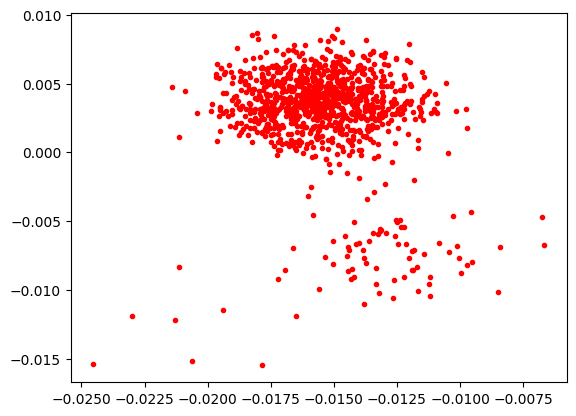

In [ ]:
%matplotlib inline
# select the data with ro_amplitudesq12 = 0.051
amp = ds.ro_amplitudesq12.values[5]
# for amp in ds.ro_amplitudesq12.values:
print(amp)
qubit = 'q130'
ds0 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 0 )
ds1 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 1 )
ds2 = ds[f'y{qubit}'].sel(ro_amplitudesq13=amp ,state = 2 )
# ds0 = (ds0.values).reshape(4096*3,2)
# ds1 = (ds1.values).reshape(4096*3,2)
# ds2 = (ds2.values).reshape(4096*3,2)

cut0 = 0
cut1 = 15
plt.plot(ds0[:,0].values,ds0[:,1].values,'.r')
# plt.plot(ds1[:,0].values,ds1[:,1].values,'.b')
# plt.plot(ds1[cut0::cut1,0].values,ds1[cut0::cut1,1].values,'*')
# plt.plot(ds2[:,0].values,ds2[:,1].values,'.g')
plt.show()

assignment = 0.8388671875


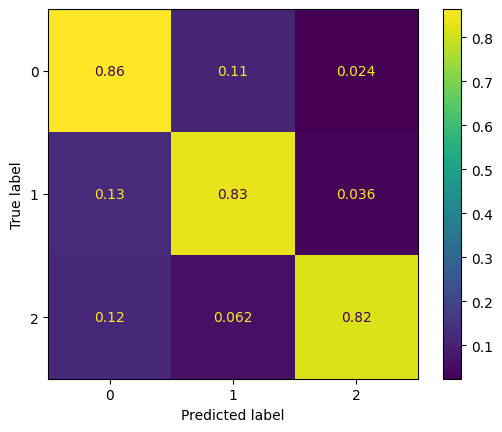

In [ ]:
import numpy as np
import redis
import xarray as xr
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

dataset = ds
qubit = 'q12'
data_var = f'y{qubit}0'

for coord in dataset.coords:
    if f'amplitudes{qubit}' in str(coord):
        amplitude_coord = coord
    elif 'state' in str(coord):
        state_coord = coord
    elif 'shot' in str(coord):
        shot_coord = coord

independents = dataset[state_coord].values
amplitudes = dataset.coords[amplitude_coord]
shots = len(dataset[shot_coord].values)
fit_results = {}
# for indx, ro_amplitude in enumerate(amplitudes):
indx = 3
# print(f'{indx = }')
# print(f'{ro_amplitude.values = }')
y = np.repeat(independents,shots)
IQ_complex = np.array([])
for state in independents:
    IQ_complex_0 = dataset[data_var].isel({amplitude_coord:[indx],state_coord:state})
    IQ_complex = np.append(IQ_complex,IQ_complex_0)
# I = IQ_complex.real.flatten()
# Q = IQ_complex.imag.flatten()
# IQ = np.array([I,Q]).T
IQ = IQ_complex.reshape(-1,2)
lda = LinearDiscriminantAnalysis(solver = "svd", store_covariance=True)
# breakpoint()
# print(IQ)
y_pred = lda.fit(IQ,y).predict(IQ)

cm = confusion_matrix(y,y_pred)
cm_norm = confusion_matrix(y,y_pred,normalize='true')
# assignment = 1 - 1/2 * (err_wr_0 + err_wr_1)
assignment = np.trace(cm_norm)/len(independents)
print(f'{assignment = }')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
disp.plot()
plt.show()

In [ ]:
from numpy.linalg import inv
print(cm_norm)
cm_inv = inv(cm_norm)
print(cm_inv)
print(np.dot(cm_inv,cm_norm))

[[0.86425781 0.11132812 0.02441406]
 [0.12890625 0.83496094 0.03613281]
 [0.12011719 0.0625     0.81738281]]
[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]
[[ 1.00000000e+00 -4.40186082e-17 -8.83285957e-18]
 [ 3.78725371e-17  1.00000000e+00  8.53131584e-18]
 [ 2.47198095e-17  0.00000000e+00  1.00000000e+00]]


In [ ]:
v = [0.87,0.11,1-0.87-0.11]
print(v)

[0.87, 0.11, 0.020000000000000004]


In [ ]:
def mitigated(v,a0,a1):
    return np.dot(cm_inv,v)-[a0,a1,1-a0-a1]
res = minimize(mitigated, v)


TypeError: mitigated() missing 2 required positional arguments: 'a0' and 'a1'

In [ ]:
a,b = 0.8,0.1
v = [a,b,1-a-b]
u = np.dot(cm_inv,v)
print(v,u,np.sum(u))

[0.8, 0.05, 0.14999999999999997] [ 0.93534224 -0.08680117  0.05269794] 0.9012390169552309


In [ ]:
# Define the function to be minimized
from scipy.linalg import norm
def m(t):
    return norm(u-np.array(t))

In [ ]:
# Define the constraints
def con(t):
   return t[0]+t[1]+t[2]-1
# Define the constraints in the form required by the minimize function
cons = ({'type': 'eq', 'fun': con},
        {'type': 'ineq', 'fun': lambda t: t[0]},
        {'type': 'ineq', 'fun': lambda t: t[1]},
        {'type': 'ineq', 'fun': lambda t: t[2]})

In [ ]:
from scipy.optimize import minimize
result = minimize(m, v, method='SLSQP', constraints=cons)
print(np.abs(np.round(result.x,10)))

[0.94132282 0.         0.05867718]


In [ ]:
cm_inv

array([[ 1.18425448, -0.1557683 , -0.02848618],
       [-0.17588313,  1.22477137, -0.04888825],
       [-0.16058158, -0.0707597 ,  1.23134128]])

In [ ]:
# nested join using join()
my_string = ",".join(str(element) for element in list(cm_inv.flatten()))
print(my_string)

1.1842544812150915,-0.15576829843331808,-0.028486182781773627,-0.1758831264569345,1.2247713733537886,-0.04888824689685401,-0.1605815783706242,-0.07075969795381643,1.2313412763244407


In [ ]:
my_list = my_string.split(",")
size = int(len(my_list)**0.5)
my_list = np.array([float(i) for i in my_list]).reshape(size,size)

print(my_list)

[[ 1.18425448 -0.1557683  -0.02848618]
 [-0.17588313  1.22477137 -0.04888825]
 [-0.16058158 -0.0707597   1.23134128]]


## Redis Parameters

In [63]:
import redis
redis_connection = redis.Redis(decode_responses=True)
node = 'cz_chevron'
qubits = ['q21','q22','q21_q22']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"cs:{qubit}")
    # Print the redis config line by line
    print(redis_config['cz_chevron'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q21:
not_calibrated
Qubit parameters q22:
not_calibrated
Qubit parameters q21_q22:
not_calibrated


In [30]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = ['q13','q14']
qubits = ['q21_q22','q16_q21']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"couplers:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")
    print(redis_config['cz_pulse_frequency'])
    print(redis_config['cz_pulse_duration'])
    print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21_q22:
215627272.72727272
3.313354605772508e-07
0.15
Qubit parameters q16_q21:
344000000.0
3.7186273915678165e-07
0.1


In [67]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q21','q22']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
        # print(f"{key}: {value}")
    print(redis_config['cz_pulse_frequency'])
    print(redis_config['cz_pulse_duration'])
    print(redis_config['cz_pulse_amplitude'])
    # print(redis_config['cz_phase'])
    # print(redis_config['cz_pop_loss'])
    # print(redis_config['cz_leakage'])

Qubit parameters q21:
nan
nan
nan
Qubit parameters q22:
nan
nan
nan


In [ ]:
import redis
redis_connection = redis.Redis(decode_responses=True)
qubits = [ 'q12','q13','q14','q15']
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    print(redis_config['freq_01'])
    print(redis_config['freq_12'])
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")

Qubit parameters q12:
3366985350.8172603
3173745577.505435
Qubit parameters q13:
3583392807.127604
3344617330.110173
Qubit parameters q14:
3333262125.7570114
3133075732.4790416
Qubit parameters q15:
3872762251.21086
3631663526.956842


## Save VNA values

In [340]:
import redis
redis_connection = redis.Redis(decode_responses=True)
# qubits = [ 'q12','q13','q14','q15']
qubits = ['q16','q17','q18','q19','q20','q21','q22','q23','q24','q25']
qubit_freq_01_list,qubit_freq_ro_list,qubit_freq_12_list = {},{},{}
for qubit in qubits: 
    print(f"Qubit parameters {qubit}:")
    redis_config = redis_connection.hgetall(f"transmons:{qubit}")
    # Print the redis config line by line
    # for key, value in redis_config.items():
    #     print(f"{key}: {value}")
    print(redis_config['ro_freq'])
    print(redis_config['freq_01'])
    print(redis_config['freq_12'])
    qubit_freq_ro_list[qubit] = redis_config['ro_freq']
    qubit_freq_01_list[qubit] = redis_config['freq_01']
    qubit_freq_12_list[qubit] = redis_config['freq_12']

Qubit parameters q16:
6489739796.816151
3189000000.0
2993400000.0
Qubit parameters q17:
7059399869.2122345
3932200000.0
3699800000.0
Qubit parameters q18:
6712742151.173621
3254000000.0
3057400000.0
Qubit parameters q19:
6818362148.027776
3914600000.0
3681600000.0
Qubit parameters q20:
6494839241.529742
3333200000.0
3132200000.0
Qubit parameters q21:
6752736342.162048
3772200000.0
3543000000.0
Qubit parameters q22:
6476748475.479722
3325800000.0
3130400000.0
Qubit parameters q23:
7051822087.369359
3910400000.0
3674200000.0
Qubit parameters q24:
6583576730.713829
3271000000.0
3072400000.0
Qubit parameters q25:
6852972354.877701
4008800000.0
3769200000.0


In [333]:
for qubit in qubits:
    d = float(qubit_freq_ro_list[qubit]) - (float(qubit_freq_01_list[qubit])+float(qubit_freq_12_list[qubit]))
    print(d/1e6)

307.3397968161507
-572.6001307877655
401.3421511736212
-777.8378519722243
29.43924152974224
-562.4636578379517
20.548475479722022
-532.777912630641
240.17673071382904
-925.0276451222992


In [341]:
from config_files.VNA_values import VNA_resonator_frequencies, VNA_qubit_frequencies, VNA_f12_frequencies
for qubit in qubits:
    VNA_resonator_frequencies[qubit] = float(qubit_freq_ro_list[qubit])
    VNA_qubit_frequencies[qubit] = float(qubit_freq_01_list[qubit])
    VNA_f12_frequencies[qubit] = float(qubit_freq_12_list[qubit])
# rewrite the VNA_values.py file
with open('config_files/VNA_values.py', 'w') as f:
    f.write(f"VNA_resonator_frequencies = {VNA_resonator_frequencies}\n")
    f.write(f"VNA_qubit_frequencies = {VNA_qubit_frequencies}\n")
    f.write(f"VNA_f12_frequencies = {VNA_f12_frequencies}\n")

In [342]:
import numpy as np
print(VNA_resonator_frequencies)
print(VNA_qubit_frequencies)
print(VNA_f12_frequencies)
anahar = (np.array(list(VNA_f12_frequencies.values()))-np.array(list(VNA_qubit_frequencies.values()))) / 1e6
print(anahar)

{'q16': 6489739796.816151, 'q17': 7059399869.2122345, 'q18': 6712742151.173621, 'q19': 6818362148.027776, 'q20': 6494839241.529742, 'q21': 6752736342.162048, 'q22': 6476748475.479722, 'q23': 7051822087.369359, 'q24': 6583576730.713829, 'q25': 6852972354.877701, 'q11': 6934503303.198933}
{'q16': 3189000000.0, 'q17': 3932200000.0, 'q18': 3254000000.0, 'q19': 3914600000.0, 'q20': 3333200000.0, 'q21': 3772200000.0, 'q22': 3325800000.0, 'q23': 3910400000.0, 'q24': 3271000000.0, 'q25': 4008800000.0}
{'q16': 2993400000.0, 'q17': 3699800000.0, 'q18': 3057400000.0, 'q19': 3681600000.0, 'q20': 3132200000.0, 'q21': 3543000000.0, 'q22': 3130400000.0, 'q23': 3674200000.0, 'q24': 3072400000.0, 'q25': 3769200000.0}
[-195.6 -232.4 -196.6 -233.  -201.  -229.2 -195.4 -236.2 -198.6 -239.6]


In [ ]:
# VNA_resonator_frequencies = {'q11': 6934572785.610347, 'q12': 6606753684.764918, 'q13': 6688313321.558435, 'q14': 6331351280.923618, 'q15': 6933698139.447023, 'q16': 6491000000.0, 'q17': 7059000000.0, 'q18': 6712000000.0, 'q19': 6818000000.0, 'q20': 6494000000.0, 'q21': 6751000000.0, 'q22': 6477000000.0, 'q23': 7052000000.0, 'q24': 6583000000.0, 'q25': 6853000000.0}
# VNA_qubit_frequencies = {'q11': 3714895945.38633, 'q12': 3366961177.836733, 'q13': 3585016857.038436, 'q14': 3334060710.6204877, 'q15': 3872936707.280074, 'q16': 3189000000.0, 'q17': 3932000000.0, 'q18': 3254000000.0, 'q19': 3921000000.0, 'q20': 3333000000.0, 'q21': 3773000000.0, 'q22': 3326000000.0, 'q23': 3911000000.0, 'q24': 3271000000.0, 'q25': 4009000000.0}
# VNA_f12_frequencies = {'q11': 3480306890.6912713, 'q12': 3174059567.052809, 'q13': 3343386697.937837, 'q14': 3133224381.376709, 'q15': 3631763299.7146664, 'q16': 2993000000.0, 'q17': 3699000000.0, 'q18': 3154000000.0, 'q19': 3682000000.0, 'q20': 3233000000.0, 'q21': 3542000000.0, 'q22': 3131000000.0, 'q23': 3674000000.0, 'q24': 3171000000.0, 'q25': 3770000000.0}
